In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
#shapefile for the city of London by boroush
fp = "/home/habtemariam/Documents/ADS/statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp"
lon_borshp = gpd.read_file(fp)

In [3]:
lon_borshp.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.6 160201.8, 516407.3 160210.5..."
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.2 159504.7, 535005.5 159502, ..."
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.6 157530.4, 540361.2 157551.9..."
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.8 178100, 521967.7 178096.8, ..."
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.5 182881.6, 510249.9 182886, ..."


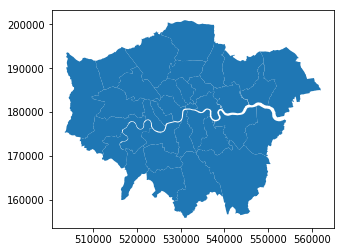

In [4]:
lon_borshp.plot()

In [5]:
vans_lon = pd.read_excel("/home/habtemariam/Documents/ADS/statistical-gis-boundaries-london/ESRI/r21ewrttableks404ewladv1_tcm77-290721.xls", sheet_name='KS404EW_Ranks', usecols="B,C,D,E", skiprows=[11, 12, 13, 14], header=10)

In [6]:
vans_lon.head()

,Region name,LAD/UA code,LAD/UA name,All categories: Car or van availability
0,North East,E06000047,County Durham UA,223803.0
1,North East,E06000005,Darlington UA,46670.0
2,North East,E06000001,Hartlepool UA,40434.0
3,North East,E06000002,Middlesbrough UA,57203.0
4,North East,E06000048,Northumberland UA,138534.0


In [7]:
vans_lon = vans_lon[vans_lon['Region name'] == 'London']

In [8]:
vans_lon = vans_lon.reset_index(drop=True)

In [9]:
vans_lon.head()

,Region name,LAD/UA code,LAD/UA name,All categories: Car or van availability
0,London,E09000007,Camden,97534.0
1,London,E09000001,City of London,4385.0
2,London,E09000012,Hackney,101690.0
3,London,E09000013,Hammersmith and Fulham,80590.0
4,London,E09000014,Haringey,101955.0


In [10]:
# let's rename column names to something simpler suing a dictionary
vans_cars = vans_lon.rename(index=str, columns={"LAD/UA name": "Borough",
                                      "All categories: Car or van availability": "Cars or vans",
                                      "LAD/UA code": "Unitary authority"
                                      })

In [11]:
vans_cars.head()

,Region name,Unitary authority,Borough,Cars or vans
0,London,E09000007,Camden,97534.0
1,London,E09000001,City of London,4385.0
2,London,E09000012,Hackney,101690.0
3,London,E09000013,Hammersmith and Fulham,80590.0
4,London,E09000014,Haringey,101955.0


In [12]:
cars_vans_bor = lon_borshp.set_index('NAME').join(vans_cars.set_index('Borough'))

In [13]:
cars_vans_bor.head()

,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,Region name,Unitary authority,Cars or vans
NAME,,,,,,,,,,
Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.6 160201.8, 516407.3 160210.5...",London,E09000021,63639.0
Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.2 159504.7, 535005.5 159502, ...",London,E09000008,145010.0
Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.6 157530.4, 540361.2 157551.9...",London,E09000006,130862.0
Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.8 178100, 521967.7 178096.8, ...",London,E09000018,94902.0
Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.5 182881.6, 510249.9 182886, ...",London,E09000009,124082.0


In [19]:
cars_vans_bor['Cars or vans'] = cars_vans_bor['Cars or vans'].astype(int)

In [20]:
cars_vans_bor.head()

,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,Region name,Unitary authority,Cars or vans
NAME,,,,,,,,,,
Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.6 160201.8, 516407.3 160210.5...",London,E09000021,63639
Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.2 159504.7, 535005.5 159502, ...",London,E09000008,145010
Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.6 157530.4, 540361.2 157551.9...",London,E09000006,130862
Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.8 178100, 521967.7 178096.8, ...",London,E09000018,94902
Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.5 182881.6, 510249.9 182886, ...",London,E09000009,124082


In [16]:
cars_vans_bor['Cars or vans'].max()

145010.0

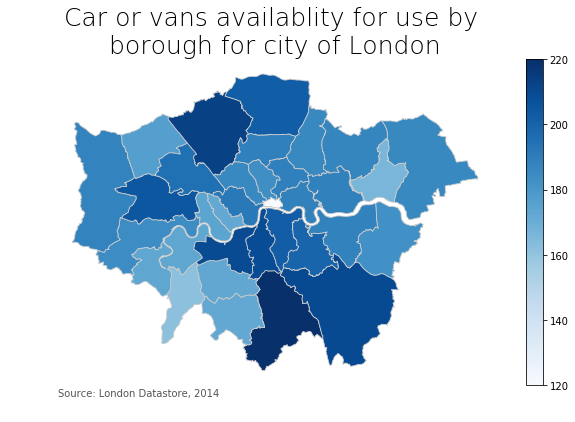

In [31]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'Cars or vans'

# set the range for the choropleth
vmin, vmax = 120, 220

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

# create map
cars_vans_bor.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

# Now we can customise and add annotations

# remove the axis
ax.axis('off')

# add a title
ax.set_title('Car or vans availablity for use by \n'  
             'borough for city of London', \
              fontdict={'fontsize': '25',
                        'fontweight' : '5'})

# create an annotation for the  data source
ax.annotate('Source: London Datastore, 2014',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

# this will save the figure as a high-res png. you can also save as svg
fig.savefig('testmap.png', dpi=300)
